In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
import scipy.odr, scipy.special, scipy.stats 
import scipy.signal as signal
import sys

import matplotlib.pyplot as plt
%matplotlib inline
params = {'legend.fontsize': 24,
          'figure.figsize': (15, 10),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params)

#Simple sintonizado, una etapa.


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


# Respuesta en frecuencia de un Doble Sintonizado

El siguiente código permite graficar el comportamiento de un filtro doble sintonizado. 

Para el analisis se emplea la respuesta en frecuencia :

# $\frac{v_o}{i_g} = \frac{- y_{21}  }{y_{1}y_{2} - y_{12}y_{21}  }$ 

# $\frac{v_o}{i_g} = \frac{- y_{21}  }{(g_1+S C_1+\frac{1}{sL_1})(g_2+S C_2+\frac{1}{sL_2}) - y_{12}y_{21}  }$ 

# $\frac{v_o}{i_g} = \frac{- S^2 y_{21}  }{\frac{C_1}{S}(S^2+S \frac{w_o}{Q_1} +w_o^2)\frac{C_2}{S}(S^2+S \frac{w_o}{Q_2} +w_o^2) - y_{12}y_{21}  }$ 

# $\frac{v_o}{i_g} = \frac{- S^2 y_{21}  }{C_1 C_2 (S^2+S \frac{w_o}{Q} +w_o^2)^2 - \frac{y_{12}y_{21} }{C_1 C_2} S^2 }$ 

# $\frac{v_o}{i_g} = \frac{- y_{21}  }{G_1 G_2} \frac{1}{[1-\chi_1^2 \frac{Q_2}{Q_1}-2 a cos(\phi_t)]+j[\chi_1(1+\frac{Q_2}{Q_1})-2 a sen(\phi_t)]}$ 



# $G_T = 4 \frac{| y_{21}|^2  }{G_1^2 G_2^2} G_L G_g \frac{1}{[1-\chi_1^2 \frac{Q_2}{Q_1}-2 a cos(\phi_t)]^2+[\chi_1(1+\frac{Q_2}{Q_1})-2 a sen(\phi_t)]^2}$ 

In [10]:
g1 = 1e-2
g2 = 1e-3
fo = 455e3
wo = 2*np.pi*fo
Q1 = 10
Q2 = 10
a  = 0.1
gm = 0.1
phi = -np.pi/2
y21 = -gm 
y12 = -1j*wo*1e-12 



In [19]:
def Xn(f,Q,fo):
    return 2*Q*(f-fo)/fo

def Dx(f,X,Q1,Q2,a,phi):
    return ( (1-Q2/Q1*X-2*a*np.cos(phi))**2 + (X(1+Q2/Q1)-2*a*np.sin(phi))**2 )**0.5



def Gto(f,X1,X2,a,phi,y21,GL,Gg):
    return 4*abs(y21)**2*GL*Gg/(g1*g2)**2/Dx(f,X1,X2,a,phi)


def a_Gtom(Gt,y12,y21,)

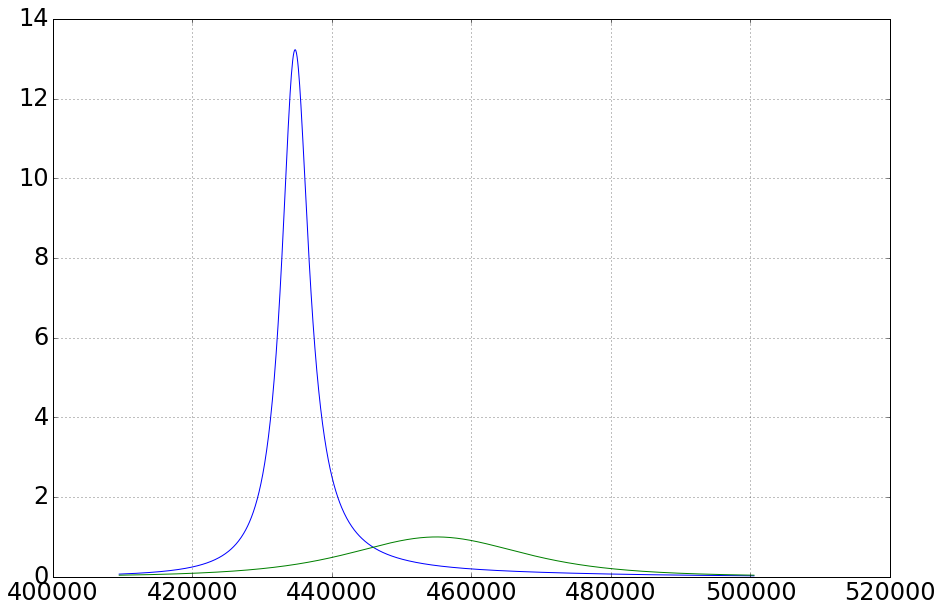

In [24]:
freq = np.linspace(fo*0.9,fo*1.1,1e3)

a =0.8

plt.figure()
plt.plot(freq, [1/Dx(f,Xn(f,Q1,fo),Xn(f,Q2,fo),a,phi) for f in freq])
plt.plot(freq, [1/Dx(f,Xn(f,Q1,fo),Xn(f,Q2,fo),0,phi) for f in freq])

plt.grid()
#plt.xlim([-30,10])
#plt.ylim([-120,120])
plt.show()


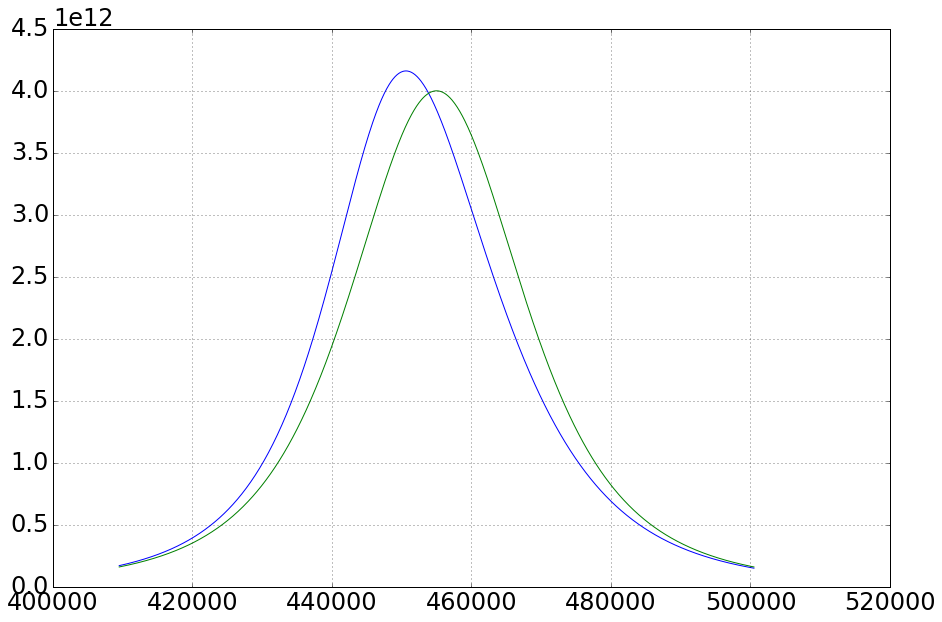

In [20]:
freq = np.linspace(fo*0.9,fo*1.1,1e3)

plt.figure()
plt.plot(freq, [Gto(f,Xn(f,Q1,fo),Xn(f,Q2,fo),a,phi,y21,100,100) for f in freq])
plt.plot(freq, [Gto(f,Xn(f,Q1,fo),Xn(f,Q2,fo),0,phi,y21,100,100) for f in freq])

plt.grid()
#plt.xlim([-30,10])
#plt.ylim([-120,120])
plt.show()
